<div class="alert alert-block alert-info" style="margin-top: 20px">
    <a href="https://cocl.us/corsera_da0101en_notebook_top">
         <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/Images/TopAd.png" width="750" align="center">
    </a>
</div>


<a href="https://www.bigdatauniversity.com"><img src = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/Images/CCLog.png" width = 300, align = "center"></a>

<h1 align=center><font size = 5>Data Analysis with Python</font></h1>

Exploratory Data Analysis - L'analyse exploratoire des données

<h3>Welcome!</h3>
Dans cette section, nous explorerons plusieurs méthodes pour voir si certaines caractéristiques ou fonctionnalités peuvent être utilisées pour prédire le prix d'une voiture.

<h2>Table des matières</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<ol>
     <li> <a href="#import_data"> Importer des données depuis le module </a> </li>
     <li> <a href="#pattern_visualization"> Analyse de modèles d'entités individuelles à l'aide de la visualisation </a> </li>
     <li> <a href="#discriptive_statistics"> Analyse statistique descriptive </a> </li>
     <li> <a href="#basic_grouping"> Principes de base du regroupement </a> </li>
     <li> <a href="#correlation_causation"> Corrélation et causalité </a> </li>
     <li> <a href="#anova"> ANOVA </a> </li>
</ol>
    

</div>
 
<hr>

<h3>Quelles sont les principales caractéristiques qui ont le plus d'impact sur le prix de la voiture?</h3>

<h2 id="import_data">1. Importer des données depuis le module 2</h2>

<h4>Setup</h4>

Importer des bibliothèques 

In [1]:
import pandas as pd
import numpy as np

charger les données et les stocker dans le dataframe df:

In [5]:
path = r'C:\python_pratique\data science\3_Exploration des data/automobileEDA.csv'
df = pd.read_csv(path)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.470000,2.68,9.00,111.000000,5000.000000,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.470000,2.68,9.00,111.000000,5000.000000,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,52.4,2823,ohcv,six,152,mpfi,2.680000,3.47,9.00,154.000000,5000.000000,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,54.3,2337,ohc,four,109,mpfi,3.190000,3.40,10.00,102.000000,5500.000000,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,54.3,2824,ohc,five,136,mpfi,3.190000,3.40,8.00,115.000000,5500.000000,18,22,17450.0,13.055556,Medium,0,1
5,2,122,audi,std,two,sedan,fwd,front,99.8,0.851994,0.920833,53.1,2507,ohc,five,136,mpfi,3.190000,3.40,8.50,110.000000,5500.000000,19,25,15250.0,12.368421,Medium,0,1
6,1,158,audi,std,four,sedan,fwd,front,105.8,0.925997,0.991667,55.7,2844,ohc,five,136,mpfi,3.190000,3.40,8.50,110.000000,5500.000000,19,25,17710.0,12.368421,Medium,0,1
7,1,122,audi,std,four,wagon,fwd,front,105.8,0.925997,0.991667,55.7,2954,ohc,five,136,mpfi,3.190000,3.40,8.50,110.000000,5500.000000,19,25,18920.0,12.368421,Medium,0,1
8,1,158,audi,turbo,four,sedan,fwd,front,105.8,0.925997,0.991667,55.9,3086,ohc,five,131,mpfi,3.130000,3.40,8.30,140.000000,5500.000000,17,20,23875.0,13.823529,Medium,0,1
9,2,192,bmw,std,two,sedan,rwd,front,101.2,0.849592,0.900000,54.3,2395,ohc,four,108,mpfi,3.500000,2.80,8.80,101.000000,5800.000000,23,29,16430.0,10.217391,Low,0,1


<h2 id = "pattern_visualization"> 2. Visualisation </h2>

Pour installer seaborn, nous utilisons le pip qui est le gestionnaire de paquets python.

In [6]:
%%capture
! pip install seaborn

 Importez les packages de visualisation "Matplotlib" et "Seaborn", n'oubliez pas "% matplotlib inline" pour tracer dans un notebook Jupyter.

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

<h4> Comment choisir la bonne méthode de visualisation? </h4>
<p> Lorsque vous visualisez des variables individuelles, il est important de comprendre d'abord à quel type de variable vous avez affaire. Cela nous aidera à trouver la bonne méthode de visualisation pour cette variable. </p>

In [8]:
# list the data types for each column
print(df.dtypes)

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object


<div class = "alert alert-danger alertdanger" style = "margin-top: 20px">
<h3> Question n ° 1: </h3>

<b> Quel est le type de données de la colonne "pic-rpm"? </b>
</div>

par exemple, on peut calculer la corrélation entre les variables de type "int64" ou "float64" en utilisant la méthode "corr":

In [9]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


Les éléments diagonaux sont toujours un; nous étudierons la corrélation plus précisément la corrélation de Pearson en profondeur en fin de cahier.

<div class = "alert alert-danger alertdanger" style = "margin-top: 20px">
<h1> Question n ° 2: </h1>

<p> Trouvez la corrélation entre les colonnes suivantes: bore, stroke,compression-ratio , and horsepower. </p>
<p> Astuce: si vous souhaitez sélectionner ces colonnes, utilisez la syntaxe suivante: df [['bore', 'stroke', 'compression-ratio', 'horsepower']] </p>
</div>

In [10]:
#Écrivez votre code ci-dessous et appuyez sur Shift + Entrer pour exécuter

df[['bore', 'stroke', 'compression-ratio', 'horsepower']].corr() 

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566936
stroke,-0.055390,1.000000,0.187923,0.098462
compression-ratio,0.001263,0.187923,1.000000,-0.214514
horsepower,0.566936,0.098462,-0.214514,1.000000


<h2> Variables numériques continues: </h2>

<p> Valeur numérique continue <h2> Variables numériques continue: </h2>

<p> Les variables numériques continues sont des variables qui peuvent contenir n'importe quelle valeur dans une certaine plage. Les variables numériques continues peuvent avoir le type "int64" ou "float64". Un excellent moyen de visualiser ces variables consiste à utiliser des nuages de points avec des lignes ajustées. </p>

<p> Pour commencer à comprendre la relation (linéaire) entre une variable individuelle et le prix. Nous pouvons le faire en utilisant "regplot", qui trace le nuage de points plus la droite de régression ajustée pour les données. </p>ariables are variables that may contain any value within some range. Continuous numerical variables can have the type "int64" or "float64". A great way to visualize these variables is by using scatterplots with fitted lines.</p>

<p>In order to start understanding the (linear) relationship between an individual variable and the price. We can do this by using "regplot", which plots the scatterplot plus the fitted regression line for the data.</p>

Voyons plusieurs exemples de différentes relations linéaires:

<h4> Relation linéaire positive </h4>

Let's find the scatterplot of "engine-size" and "price" 

(0.0, 53687.300964964175)

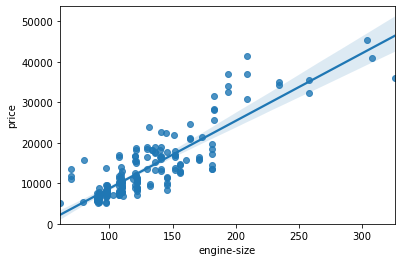

In [14]:
# Engine size as potential predictor variable of price
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

<p> À mesure que la taille du moteur augmente, le prix augmente: cela indique une corrélation directe positive entre ces deux variables. La taille du moteur semble être un assez bon prédicteur du prix puisque la ligne de régression est presque une ligne diagonale parfaite. </p>

Nous pouvons examiner la corrélation entre la 'engine-size' - ''taille du moteur '' et le ''prix '' et voir qu'elle est d'environ 0,87

In [15]:
df[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


L'autoroute mpg est une variable prédictive potentielle du prix

<AxesSubplot:xlabel='highway-mpg', ylabel='price'>

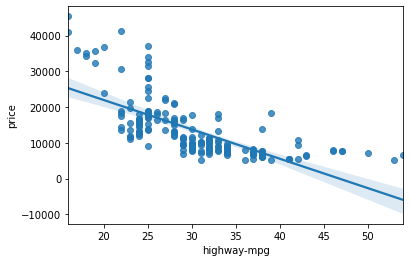

In [16]:
sns.regplot(x="highway-mpg", y="price", data=df)

<p> Au fur et à mesure que le mpg autoroute augmente, le prix baisse: cela indique une relation inverse / négative entre ces deux variables. L'autoroute mpg pourrait potentiellement être un indicateur de prix. </p>

Nous pouvons examiner la corrélation entre 'highway-mpg' et 'price' et voir qu'elle est d'environ -0,704

In [17]:
df[['highway-mpg', 'price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


<h3> Relation linéaire faible </h3>

Let's see if "Peak-rpm" as a predictor variable of "price".

<AxesSubplot:xlabel='peak-rpm', ylabel='price'>

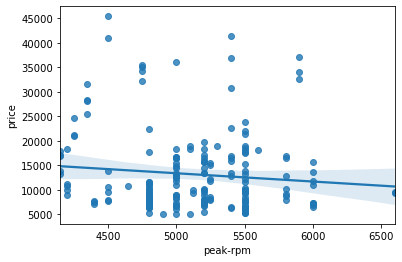

In [18]:
sns.regplot(x="peak-rpm", y="price", data=df)

<p> Le régime maximal ne semble pas du tout être un bon prédicteur du prix puisque la droite de régression est proche de l'horizontale. De plus, les points de données sont très dispersés et éloignés de la ligne d'ajustement, ce qui montre beaucoup de variabilité. Ce n'est donc pas une variable fiable. </p>

Nous pouvons examiner la corrélation entre 'peak-rpm' et 'price' et voir qu'elle est d'environ -0,101616

In [19]:
df[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


<div class = "alert alert-danger alertdanger" style = "margin-top: 20px">
<h1> Question 3 a): </h1>

<p> Trouvez la corrélation entre x = "stroke", y = "price". </p>
<p> Astuce: si vous souhaitez sélectionner ces colonnes, utilisez la syntaxe suivante: df [["stroke", "price"]] </p>
</div>

In [20]:
# Écrivez votre code ci-dessous et appuyez sur Shift + Entrer pour exécuter
# La corrélation est de 0,0823, les éléments non diagonaux du tableau.
#code:
df[["stroke","price"]].corr() 

,stroke,price
stroke,1.00000,0.08231
price,0.08231,1.00000


<div class = "alert alert-danger alertdanger" style = "margin-top: 20px">
<h1> Question 3 b): </h1>

<p> Compte tenu des résultats de corrélation entre "prix" et "accident vasculaire cérébral", vous attendez-vous à une relation linéaire? </p>
<p> Vérifiez vos résultats en utilisant la fonction "regplot ()". </p>
</div>

<AxesSubplot:xlabel='stroke', ylabel='price'>

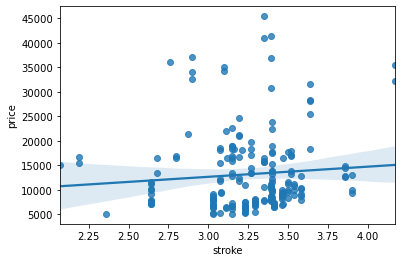

In [21]:
# Write your code below and press Shift+Enter to execute 
#Il existe une faible corrélation entre la variable 'stroke' et 'price' 
#en tant que telle régression ne fonctionnera pas bien. Nous #pouvons voir cette utilisation de "regplot" pour le démontrer.

#Code:
sns.regplot(x="stroke", y="price", data=df)

<h3> Variables catégorielles </h3>

<p> Ce sont des variables qui décrivent une «caractéristique» d'une unité de données et qui sont sélectionnées dans un petit groupe de catégories. Les variables catégorielles peuvent avoir le type "object" ou "int64". Un bon moyen de visualiser les variables catégorielles consiste à utiliser des boîtes à moustaches. </p>

Regardons la relation entre "body-style" and "price".

<AxesSubplot:xlabel='body-style', ylabel='price'>

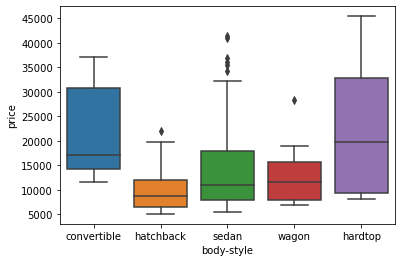

In [24]:
sns.boxplot(x="body-style", y="price", data=df)

<p> Nous voyons que les distributions de prix entre les différentes catégories de styles de carrosserie se chevauchent considérablement et que le style de carrosserie ne serait donc pas un bon prédicteur de prix. Examinons "l'emplacement du moteur" et le "prix" du moteur: </p>

<AxesSubplot:xlabel='engine-location', ylabel='price'>

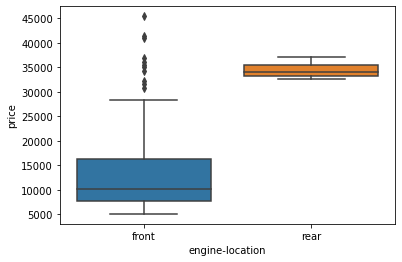

In [19]:
sns.boxplot(x="engine-location", y="price", data=df)

<p> Ici, nous voyons que la répartition des prix entre ces deux catégories d'emplacement du moteur, avant et arrière, est suffisamment distincte pour prendre l'emplacement du moteur comme un bon prédicteur potentiel du prix. </p>

Examinons "drive-wheels" et "price".

<AxesSubplot:xlabel='drive-wheels', ylabel='price'>

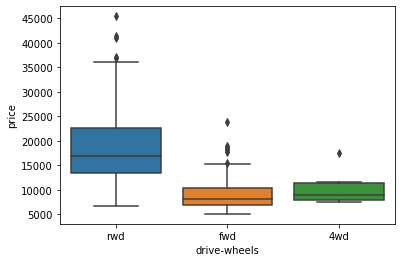

In [20]:
# drive-wheels
sns.boxplot(x="drive-wheels", y="price", data=df)

<p> On voit ici que la répartition des prix entre les différentes catégories de roues motrices diffère; en tant que telles, les roues motrices pourraient être un prédicteur du prix. </p>

<h2 id = "discriptive_statistics"> 3. Analyse statistique descriptive </h2>

<p> Examinons d'abord les variables en utilisant une méthode de description. </p>

<p> La fonction <b> describe </b> calcule automatiquement les statistiques de base pour toutes les variables continues. Toutes les valeurs NaN sont automatiquement ignorées dans ces statistiques. </p>

Cela montrera:
<ul>
     <li> le nombre de cette variable </li>
     <li> la moyenne </li>
     <li> l'écart type (std) </li>
     <li> la valeur minimale </li>
     <li> l'IQR (Interquartile Range: 25%, 50% et 75%) </li>
     <li> la valeur maximale </li>
<ul>

Nous pouvons appliquer la méthode "describe" comme suit:

In [21]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


Le paramètre par défaut "décrire" ignore les variables de type objet. On peut appliquer la méthode "describe" sur les variables de type 'object' comme suit:

In [22]:
df.describe(include=['object'])

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,200
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,115


<h3>Comptage des valeurs</h3>

<p> Le comptage des valeurs est un bon moyen de comprendre le nombre d'unités de chaque caractéristique / variable que nous avons. Nous pouvons appliquer la méthode "value_counts" sur la colonne "roues motrices". N'oubliez pas que la méthode "value_counts" ne fonctionne que sur les séries Pandas, pas sur les Dataframes Pandas. Par conséquent, nous n'incluons qu'un seul support "df ['roues motrices']" et non deux supports "df [['roues motrices']]". </p>

In [23]:
df['drive-wheels'].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

Nous pouvons convertir la série en Dataframe comme suit:

In [24]:
df['drive-wheels'].value_counts().to_frame()

,drive-wheels
fwd,118
rwd,75
4wd,8


Répétons les étapes ci-dessus mais sauvegardons les résultats dans le dataframe "drive_wheels_counts" et renommez la colonne "drive-wheels" en "value_counts".

In [25]:
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)
drive_wheels_counts

,value_counts
fwd,118
rwd,75
4wd,8


Renommons maintenant l'index en 'drive-wheels':

In [26]:
drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts

,value_counts
drive-wheels,
fwd,118
rwd,75
4wd,8


We can repeat the above process for the variable'engine-location'.

In [27]:
# engine-location as variable
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts.head(10)

,value_counts
engine-location,
front,198
rear,3


<p> Examiner le nombre de valeurs de l'emplacement du moteur ne serait pas une bonne variable de prédiction du prix. C'est parce que nous n'avons que trois voitures avec un moteur arrière et 198 avec un moteur à l'avant, ce résultat est biaisé. Ainsi, nous ne sommes pas en mesure de tirer des conclusions sur l'emplacement du moteur. </p>

<h2 id = "basic_grouping"> 4. Principes de base du regroupement </h2>

<p> La méthode "groupby" regroupe les données par différentes catégories. Les données sont regroupées en fonction d'une ou plusieurs variables et l'analyse est effectuée sur les groupes individuels. </p>

<p> Par exemple, regroupons par la variable "roues motrices". Nous voyons qu'il existe 3 catégories différentes de roues motrices. </p>

In [28]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

<p> Si nous voulons savoir, en moyenne, quel type de roue motrice est le plus précieux, nous pouvons regrouper les "roues motrices" et les évaluer ensuite. </p>

<p> Nous pouvons sélectionner les colonnes drive-wheels', 'body-style' et 'price', puis l'affecter à la variable "df_group_one". </p>

In [29]:
df_group_one = df[['drive-wheels','body-style','price']]

On peut alors calculer le prix moyen pour chacune des différentes catégories de données.

In [30]:
# grouping results
df_group_one = df_group_one.groupby(['drive-wheels'],as_index=False).mean()
df_group_one

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


<p> D'après nos données, il semble que les véhicules à traction arrière soient, en moyenne, les plus chers, tandis que les 4 roues et les roues avant ont à peu près le même prix. </p>

<p> Vous pouvez également grouper avec plusieurs variables. Par exemple, regroupons à la fois les «roues motrices» et le «style de carrosserie». Cela regroupe la trame de données par les combinaisons uniques «roues motrices» et «style de carrosserie». Nous pouvons stocker les résultats dans la variable 'grouped_test1'. </p>

In [31]:
# grouping results
df_gptest = df[['drive-wheels','body-style','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


<p> Ces données groupées sont beaucoup plus faciles à visualiser lorsqu'elles sont transformées en tableau croisé dynamique. Un tableau croisé dynamique est comme une feuille de calcul Excel, avec une variable le long de la colonne et une autre le long de la ligne. Nous pouvons convertir le dataframe en tableau croisé dynamique en utilisant la méthode "pivot" pour créer un tableau croisé dynamique à partir des groupes. </p>

<p> Dans ce cas, nous allons laisser la variable de roue motrice comme les lignes du tableau, et faire pivoter le style du corps pour devenir les colonnes du tableau: </p>

In [32]:
grouped_pivot = grouped_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

<p> Souvent, nous n'avons pas de données pour certaines des cellules du pivot. Nous pouvons remplir ces cellules manquantes avec la valeur 0, mais toute autre valeur pourrait également être utilisée. Il convient de mentionner que les données manquantes sont un sujet assez complexe et constituent un cours complet en soi. </p>

In [33]:
grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

<div class = "alert alert-danger alertdanger" style = "margin-top: 20px">
<h1> Question 4: </h1>

<p> Utiliser la fonction "groupby" pour trouver le "prix" moyen de chaque voiture en fonction du "style de carrosserie"? </p>
</div>

In [34]:
# Écrivez votre code ci-dessous et appuyez sur Maj + Entrée pour exécuter
# résultats du regroupement

df_gptest2 = df[['body-style','price']]
grouped_test_bodystyle = df_gptest2.groupby(['body-style'],as_index= False).mean()
grouped_test_bodystyle

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


Si vous n'avez pas importé "pyplot", recommençons.

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline 

<h4> Variables: roues motrices et style de carrosserie par rapport au prix </h4>

Utilisons une carte de chaleur pour visualiser la relation entre le style corporel et le prix.

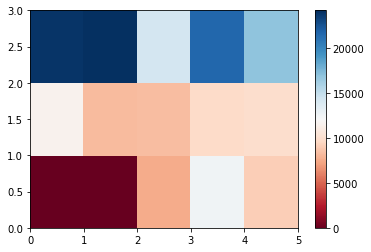

In [36]:
#use the grouped results
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

<p> La carte thermique trace la variable cible (prix) proportionnelle à la couleur par rapport aux variables «roue motrice» et «style de carrosserie» respectivement sur les axes vertical et horizontal. Cela nous permet de visualiser comment le prix est lié à la «roue motrice» et au «style de carrosserie». </p>

<p> Les étiquettes par défaut ne nous transmettent aucune information utile. Changeons cela: </p>

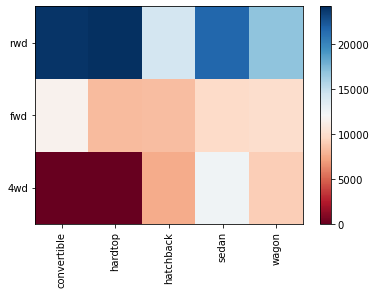

In [37]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

<p> La visualisation est très importante en science des données et les packages de visualisation Python offrent une grande liberté. Nous irons plus en détail dans un cours distinct sur les visualisations Python. </p>

<p> La principale question à laquelle nous voulons répondre dans ce module est "Quelles sont les principales caractéristiques qui ont le plus d'impact sur le prix de la voiture?". </p>

<p> Pour mieux mesurer les caractéristiques importantes, nous examinons la corrélation de ces variables avec le prix de la voiture, en d'autres termes: comment le prix de la voiture dépend-il de cette variable? </p>

<h2 id = "correlation_causation"> 5. Corrélation et causalité </h2>

<p> <b> Corrélation </b>: une mesure de l'étendue de l'interdépendance entre les variables. </p>

<p> <b> Causation </b>: la relation entre cause et effet entre deux variables. </p>

<p> Il est important de connaître la différence entre les deux et que la corrélation n'implique pas de causalité. La détermination de la corrélation est beaucoup plus simple la détermination de la causalité car la causalité peut nécessiter une expérimentation indépendante. </p>

<p3> Corrélation de Pearson </p>
<p> La corrélation de Pearson mesure la dépendance linéaire entre deux variables X et Y. </p>
<p> Le coefficient résultant est une valeur comprise entre -1 et 1 inclus, où: </p>
<ul>
     <li> <b> 1 </b>: corrélation linéaire positive totale. </li>
     <li> <b> 0 </b>: pas de corrélation linéaire, les deux variables ne s’affectent probablement pas. </li>
     <li> <b> -1 </b>: corrélation linéaire négative totale. </li>
</ul>

<p> La corrélation de Pearson est la méthode par défaut de la fonction "corr". Comme auparavant, nous pouvons calculer la corrélation de Pearson des variables 'int64' ou 'float64'. </p>

In [38]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


parfois, nous aimerions connaître la signification de l'estimation de corrélation.

<b> Valeur P </b>:
<p> Quelle est cette valeur P? La valeur P est la valeur de probabilité que la corrélation entre ces deux variables soit statistiquement significative. Normalement, nous choisissons un niveau de signification de 0,05, ce qui signifie que nous sommes sûrs à 95% que la corrélation entre les variables est significative. </p>

Par convention, lorsque le
<ul>
     <li> La valeur p est de <0,001 $: nous disons qu'il existe des preuves solides que la corrélation est significative. </li>
     <li> la valeur p est de $ <0,05 $: il existe des preuves modérées que la corrélation est significative. </li>
     <li> la valeur p est $ <0,1 $: il y a peu de preuves que la corrélation est significative. </li>
     <li> la valeur p est $> 0,1 $: rien n'indique que la corrélation est significative. </li>
</ul>

Nous pouvons obtenir ces informations en utilisant le module "stats" de la bibliothèque "scipy".

In [39]:
from scipy import stats

<h3> Empattement par rapport au prix </h3>

Calculons le coefficient de corrélation de Pearson et la valeur P de «l'empattement» et du «prix».

In [40]:
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.584641822265508  with a P-value of P = 8.076488270733218e-20


<h5> Conclusion: </h5>
<p> La valeur p étant $<0,001 $, la corrélation entre wheel-base et price est statistiquement significative, bien que la relation linéaire ne soit pas extrêmement forte (~ 0,585) </p>

<h3> Puissance par rapport au prix </h3>

Calculons le coefficient de corrélation de Pearson et la valeur p de 'horsepower' et 'price'.

In [41]:
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.809574567003656  with a P-value of P =  6.369057428259557e-48


<h5> Conclusion: </h5>

<p> Étant donné que la valeur p est $<0,001 $, la corrélation entre la puissance et le prix est statistiquement significative et la relation linéaire est assez forte (~ 0,809, proche de 1) </p>

<h3> Longueur par rapport au prix </h3>

Calculons le coefficient de corrélation de Pearson et la valeur P de 'length' and 'price'.

In [42]:
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.6906283804483639  with a P-value of P =  8.016477466159328e-30


<h5> Conclusion: </h5>
<p> La valeur p étant $<0,001 $, la corrélation entre la longueur et le prix est statistiquement significative et la relation linéaire est modérément forte (~ 0,691). </p>

<h3> Largeur par rapport au prix </h3>

Calculons le coefficient de corrélation de Pearson et la valeur p de 'width' et 'price':

In [43]:
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value ) 

The Pearson Correlation Coefficient is 0.7512653440522675  with a P-value of P = 9.200335510481123e-38


##### Conclusion:

Puisque la valeur p est <0,001, la corrélation entre la largeur et le prix est statistiquement significative et la relation linéaire est assez forte (~ 0,751).

### Curb-weight vs Price

 Calculons le coefficient de corrélation de Pearson et P-value de 'curb-weight' et 'price':

In [44]:
pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.8344145257702844  with a P-value of P =  2.189577238893878e-53


<h5> Conclusion: </h5>
<p> Étant donné que la valeur p est $<$ 0.001 USD, la corrélation entre le poids à vide et le prix est statistiquement significative, et la relation linéaire est assez forte (~ 0,834). </p>

<h3> Taille du moteur par rapport au prix </h3>

Calculons le coefficient de corrélation de Pearson et P-value de 'engine-size' and 'price':

In [45]:
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.8723351674455185  with a P-value of P = 9.265491622198389e-64


<h5> Conclusion: </h5>

<p> Étant donné que la valeur p est de $<$ 0.001 USD, la corrélation entre la taille du moteur et le prix est statistiquement significative et la relation linéaire est très forte (~ 0,872). </p>

<h3>Bore vs Price</h3>

Calculons le coefficient de corrélation de Pearson et P-value of 'bore' et 'price':

In [46]:
pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =  ", p_value ) 

The Pearson Correlation Coefficient is 0.5431553832626602  with a P-value of P =   8.049189483935489e-17


<h5> Conclusion: </h5>
<p> La valeur p étant $<$ 0.001, la corrélation entre l'alésage et le prix est statistiquement significative, mais la relation linéaire n'est que modérée (~ 0,521). </p>

Nous pouvons relier le processus pour chaque 'City-mpg'  et 'Highway-mpg':

<h3>City-mpg vs Price</h3>

In [47]:
pearson_coef, p_value = stats.pearsonr(df['city-mpg'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is -0.6865710067844678  with a P-value of P =  2.321132065567641e-29


<h5> Conclusion: </h5>
<p> Étant donné que la valeur p est $<$ 0.001 USD, la corrélation entre la ville-mpg et le prix est statistiquement significative, et le coefficient de ~ -0,687 montre que la relation est négative et modérément forte. </p>

<h3>Highway-mpg vs Price</h3>

In [48]:
pearson_coef, p_value = stats.pearsonr(df['highway-mpg'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value ) 

The Pearson Correlation Coefficient is -0.704692265058953  with a P-value of P =  1.7495471144476358e-31


##### Conclusion:
Puisque la valeur p est <0,001, la corrélation entre autoroute-mpg et prix est statistiquement significative, et le coefficient de ~ -0,705 montre que la relation est négative et modérément forte.

<h2 id="anova">6. ANOVA</h2>

<h3> ANOVA: analyse de variance </h3>
<p> L'analyse de variance (ANOVA) est une méthode statistique utilisée pour tester s'il existe des différences significatives entre les moyennes de deux ou plusieurs groupes. ANOVA renvoie deux paramètres: </p>

<p> <b> Score du test F </b>: l'ANOVA suppose que les moyennes de tous les groupes sont les mêmes, calcule à quel point les moyennes réelles s'écartent de l'hypothèse, et le signale comme le score du test F. Un score plus élevé signifie qu'il y a une plus grande différence entre les moyennes. </p>

<p> <b> Valeur P </b>: la valeur P indique à quel point notre score calculé est statistiquement significatif. </p>

<p> Si notre variable de prix est fortement corrélée à la variable que nous analysons, attendez-vous à ce que l'ANOVA renvoie un score F-test important et une petite valeur p. </p>

<h3>Drive Wheels</h3>

<p> Puisque ANOVA analyse la différence entre différents groupes de la même variable, la fonction groupby sera utile. Comme l'algorithme ANOVA fait automatiquement la moyenne des données, nous n'avons pas besoin de prendre la moyenne à l'avance. </p>

<p> Voyons si différents types de «roues motrices» ont un impact sur le «prix», nous regroupons les données. </p>

Voyons si différents types de «roues motrices» impactent le «prix», nous regroupons les données.

In [49]:
grouped_test2=df_gptest[['drive-wheels', 'price']].groupby(['drive-wheels'])
grouped_test2.head(2)

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
136,4wd,7603.0


In [50]:
df_gptest

,drive-wheels,body-style,price
0,rwd,convertible,13495.0
1,rwd,convertible,16500.0
2,rwd,hatchback,16500.0
3,fwd,sedan,13950.0
4,4wd,sedan,17450.0
5,fwd,sedan,15250.0
6,fwd,sedan,17710.0
7,fwd,wagon,18920.0
8,fwd,sedan,23875.0
9,rwd,sedan,16430.0


Nous pouvons obtenir les valeurs du groupe de méthodes en utilisant la méthode "get_group". 

In [51]:
grouped_test2.get_group('4wd')['price']

4      17450.0
136     7603.0
140     9233.0
141    11259.0
144     8013.0
145    11694.0
150     7898.0
151     8778.0
Name: price, dtype: float64

on peut utiliser la fonction 'f_oneway' dans le module 'stats' pour obtenir le <b>F-test score</b> and <b>P-value</b>.

In [52]:
# ANOVA
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'], grouped_test2.get_group('4wd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 67.95406500780399 , P = 3.3945443577151245e-23


C'est un excellent résultat, avec un score élevé au test F montrant une forte corrélation et une valeur P de presque 0 impliquant une signification statistique presque certaine. Mais cela signifie-t-il que les trois groupes testés sont tous fortement corrélés?

#### Separately: fwd and rwd

In [53]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 130.5533160959111 , P = 2.2355306355677845e-23


Examinons les autres groupes

#### 4wd and rwd

In [54]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('rwd')['price'])  
   
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 8.580681368924756 , P = 0.004411492211225333


<h4>4wd and fwd</h4>

In [56]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('fwd')['price'])  
 
print("ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 0.665465750252303 , P = 0.41620116697845666


<h3> Conclusion: variables importantes </h3>

<p> Nous avons maintenant une meilleure idée de ce à quoi ressemblent nos données et des variables importantes à prendre en compte lors de la prévision du prix de la voiture. Nous l'avons réduit aux variables suivantes: </p>

Variables numériques continues:
<ul>
     <li> Longueur </li>
     <li> Largeur </li>
     <li> Poids à vide </li>
     <li> Taille du moteur </li>
     <li> Puissance </li>
     <li> Ville-mpg </li>
     <li> Autoroute-mpg </li>
     <li> Empattement </li>
     <li> Alésage </li>
</ul>
    
Variables catégorielles:
<ul>
     <li> Roues motrices </li>
</ul>

<p> Alors que nous entrons maintenant dans la création de modèles d'apprentissage automatique pour automatiser notre analyse, alimenter le modèle avec des variables qui affectent de manière significative notre variable cible améliorera les performances de prédiction de notre modèle. </p>

<h1>Thank you for completing this notebook</h1>

<h3>About the Authors:</h3>

This notebook was written by <a href="https://www.linkedin.com/in/mahdi-noorian-58219234/" target="_blank">Mahdi Noorian PhD</a>, <a href="https://www.linkedin.com/in/joseph-s-50398b136/" target="_blank">Joseph Santarcangelo</a>, Bahare Talayian, Eric Xiao, Steven Dong, Parizad, Hima Vsudevan and <a href="https://www.linkedin.com/in/fiorellawever/" target="_blank">Fiorella Wenver</a> and <a href=" https://www.linkedin.com/in/yi-leng-yao-84451275/ " target="_blank" >Yi Yao</a>.

<p><a href="https://www.linkedin.com/in/joseph-s-50398b136/" target="_blank">Joseph Santarcangelo</a> is a Data Scientist at IBM, and holds a PhD in Electrical Engineering. His research focused on using Machine Learning, Signal Processing, and Computer Vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.</p>

<hr>
<p>Copyright &copy; 2018 IBM Developer Skills Network. This notebook and its source code are released under the terms of the <a href="https://cognitiveclass.ai/mit-license/">MIT License</a>.</p>